In [0]:
!pip install kaggle

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

In [0]:
!kaggle competitions list

In [0]:
!kaggle competitions download -c ds4g-environmental-insights-explorer

In [0]:
pip install rasterio

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# analysing datetime
import datetime as dt
from datetime import datetime

# plotting geographical data
import folium
import rasterio as rio

# file system managemant
import os 

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# exploring the global power plant database

global_power_plants = pd.read_csv('gppd_120_pr.csv')
global_power_plants.head()

,system:index,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,geolocation_source,gppd_idnr,name,other_fuel1,other_fuel2,other_fuel3,owner,primary_fuel,source,url,wepp_id,year_of_capacity_data,.geo
0,0000000000000000315a,15.0,1942.0,USA,United States of America,685.397712,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026827,Dos Bocas,NaN,NaN,NaN,PREPA,Hydro,CEPR,http://energia.pr.gov/datos/plantas/,30936.0,0,"{""type"":""Point"",""coordinates"":[-66.66629863706..."
1,000000000000000026e5,1492.0,1975.0,USA,United States of America,8334.010812,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026809,Aguirre,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/aguirre.asp,30928.0,0,"{""type"":""Point"",""coordinates"":[-66.23079607357..."
2,00000000000000002fda,990.0,1962.0,USA,United States of America,5529.940150,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026811,Costa Sur,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/costasur.asp,30934.0,0,"{""type"":""Point"",""coordinates"":[-66.75340271704..."
3,00000000000000003f76,602.0,1960.0,USA,United States of America,3362.650475,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026814,Palo Seco,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/PALOSECO.ASP,30942.0,0,"{""type"":""Point"",""coordinates"":[-66.14859700475..."
4,00000000000000002def,10.0,1915.0,USA,United States of America,456.931808,0.0,0.0,0.0,0.0,0.0,WRI,WRI1026821,Carite 1,NaN,NaN,NaN,PREPA,Hydro,PREPA,http://www.prepa.com/historia_eng.asp https:/...,65289.0,0,"{""type"":""Point"",""coordinates"":[-66.10600367149..."


In [16]:
# no of different powerplants
global_power_plants.shape

(35, 24)

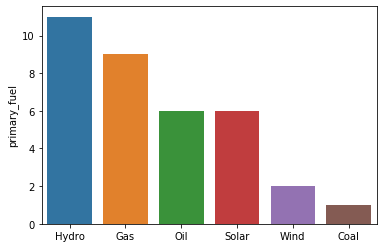

In [18]:
# let's check the different kinds of power plants based on primary fuel used.
sns.barplot(x=global_power_plants['primary_fuel'].value_counts().index, y=global_power_plants['primary_fuel'].value_counts())

In [17]:
global_power_plants['commissioning_year'].value_counts()

0.0       21
2012.0     2
1941.0     2
2015.0     1
2011.0     1
2009.0     1
1937.0     1
1929.0     1
1915.0     1
1960.0     1
1962.0     1
1975.0     1
1942.0     1
Name: commissioning_year, dtype: int64